In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置字体大小
plt.rcParams['font.size'] = 20
# 加粗图片边框
plt.rcParams['axes.linewidth'] = 2

In [36]:
data_path = r'C:\Users\cheng\Desktop\20240201\Question\Wimbledon_featured_matches.csv'
data = pd.read_csv(data_path)
print(data.head())

              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0        

In [37]:
# 按match_id分组
grouped = data.groupby('match_id')
print(grouped.size())

match_id
2023-wimbledon-1301    300
2023-wimbledon-1302    201
2023-wimbledon-1303    134
2023-wimbledon-1304    337
2023-wimbledon-1305    246
2023-wimbledon-1306    332
2023-wimbledon-1307    232
2023-wimbledon-1308    190
2023-wimbledon-1309    213
2023-wimbledon-1310    318
2023-wimbledon-1311    170
2023-wimbledon-1312    275
2023-wimbledon-1313    290
2023-wimbledon-1314    185
2023-wimbledon-1315    198
2023-wimbledon-1316    167
2023-wimbledon-1401    225
2023-wimbledon-1402    274
2023-wimbledon-1403    122
2023-wimbledon-1404    286
2023-wimbledon-1405    215
2023-wimbledon-1406    195
2023-wimbledon-1407    331
2023-wimbledon-1408    271
2023-wimbledon-1501    189
2023-wimbledon-1502    283
2023-wimbledon-1503    193
2023-wimbledon-1504    217
2023-wimbledon-1601    159
2023-wimbledon-1602    202
2023-wimbledon-1701    334
dtype: int64


In [38]:
sample_match = grouped.get_group('2023-wimbledon-1301')
print(sample_match)

                match_id         player1        player2 elapsed_time  set_no  \
0    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   
..                   ...             ...            ...          ...     ...   
295  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:53:25       4   
296  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:54:01       4   
297  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:55:02       4   
298  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:55:34       4   
299  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:56:11       4   

     game_no  point_no  p1_sets  p2_set

In [47]:
def analyse_match(match):
    match_id = match['match_id']
    player1 = match['player1']
    player2 = match['player2']
    # point_victor,winner of the point,"1 if player 1 wins, 2 if player 2 wins"
    # 统计单盘比赛中每个球员的得分情况
    set_grouped = match.groupby('set_no')
    res_dict = {
        'player_score': 0,
        'player_score_serve': 0,
        'player_score_return': 0,
        'player_score_after_win_point': 0,
        'player_score_after_lost_point': 0,
        'player_score_after_win_game': 0,
        'player_score_after_lost_game': 0,
        'player_score_after_win_set': 0,
        'player_score_after_lost_set': 0,

        'player_score_after_win_point_with_server': 0,
        'player_score_after_lost_point_with_server': 0,
        'player_score_after_win_game_with_server': 0,
        'player_score_after_lost_game_with_server': 0,
        'player_score_after_win_set_with_server': 0,
        'player_score_after_lost_set_with_server': 0,

        'player_score_after_win_point_with_return': 0,
        'player_score_after_lost_point_with_return': 0,
        'player_score_after_win_game_with_return': 0,
        'player_score_after_lost_game_with_return': 0,
        'player_score_after_win_set_with_return': 0,
        'player_score_after_lost_set_with_return': 0
    }
    last_set_winner = 0
    for set_no, set_data in set_grouped:
        game_grouped = set_data.groupby('game_no')
        last_game_winner = 0
        for game_no, game_data in game_grouped:
            last_point_winner = 0
            server = game_data['server'].values[0]
            for point_no, point_data in game_data.iterrows():
                point_victor = point_data['point_victor']
                
                res_dict['player_score'] += 1
                res_dict['player_score_serve'] += (server == point_victor)
                res_dict['player_score_return'] += (server != point_victor)
                res_dict['player_score_after_win_point'] += (last_point_winner == point_victor)
                res_dict['player_score_after_lost_point'] += (last_point_winner != point_victor and last_point_winner != 0)
                res_dict['player_score_after_win_game'] += (last_game_winner == point_victor)
                res_dict['player_score_after_lost_game'] += (last_game_winner != point_victor and last_game_winner != 0)
                res_dict['player_score_after_win_set'] += (last_set_winner == point_victor)
                res_dict['player_score_after_lost_set'] += (last_set_winner != point_victor and last_set_winner != 0)

                res_dict['player_score_after_win_point_with_server'] += (last_point_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_point_with_server'] += (last_point_winner != point_victor and last_point_winner != 0 and server == point_victor)
                res_dict['player_score_after_win_game_with_server'] += (last_game_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_game_with_server'] += (last_game_winner != point_victor and last_game_winner != 0 and server == point_victor)
                res_dict['player_score_after_win_set_with_server'] += (last_set_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_set_with_server'] += (last_set_winner != point_victor and last_set_winner != 0 and server == point_victor)

                res_dict['player_score_after_win_point_with_return'] += (last_point_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_point_with_return'] += (last_point_winner != point_victor and last_point_winner != 0 and server != point_victor)
                res_dict['player_score_after_win_game_with_return'] += (last_game_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_game_with_return'] += (last_game_winner != point_victor and last_game_winner != 0 and server != point_victor)
                res_dict['player_score_after_win_set_with_return'] += (last_set_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_set_with_return'] += (last_set_winner != point_victor and last_set_winner != 0 and server != point_victor)

            
                last_point_winner = point_data['point_victor']
            last_game_winner = point_data['game_victor']
        last_set_winner = point_data['set_victor']
    # print(res_dict)
    return res_dict
res_dict = analyse_match(sample_match)
print(res_dict)

{'player_score': 300, 'player_score_serve': 190, 'player_score_return': 110, 'player_score_after_win_point': 130, 'player_score_after_lost_point': 127, 'player_score_after_win_game': 123, 'player_score_after_lost_game': 152, 'player_score_after_win_set': 113, 'player_score_after_lost_set': 124, 'player_score_after_win_point_with_server': 93, 'player_score_after_lost_point_with_server': 66, 'player_score_after_win_game_with_server': 38, 'player_score_after_lost_game_with_server': 134, 'player_score_after_win_set_with_server': 67, 'player_score_after_lost_set_with_server': 82, 'player_score_after_win_point_with_return': 37, 'player_score_after_lost_point_with_return': 61, 'player_score_after_win_game_with_return': 85, 'player_score_after_lost_game_with_return': 18, 'player_score_after_win_set_with_return': 46, 'player_score_after_lost_set_with_return': 42}


[41.60666666666667, 84.21890547263682, 35.83582089552239, 56.997032640949556, 48.203252032520325, 76.92168674698796, 87.9396551724138, 69.06315789473685, 46.009389671361504, 13.89308176100629, 21.75294117647059, 12.829090909090908, 30.958620689655174, 44.28108108108108, 63.04040404040404, 46.035928143712574, 46.08, 74.45985401459853, 15.754098360655737, 68.53846153846153, 40.520930232558136, 42.01025641025641, 125.29305135951661, 128.59040590405905, 67.72486772486772, 73.52650176678445, 37.30569948186528, 45.16129032258065, 14.540880503144654, 41.83168316831683, 26.880239520958085]
{'player_score': 7284, 'player_score_serve': 4833, 'player_score_return': 2451, 'player_score_after_win_point': 3404, 'player_score_after_lost_point': 2692, 'player_score_after_win_game': 2529, 'player_score_after_lost_game': 4027, 'player_score_after_win_set': 2740, 'player_score_after_lost_set': 2617}
1556.60653487095


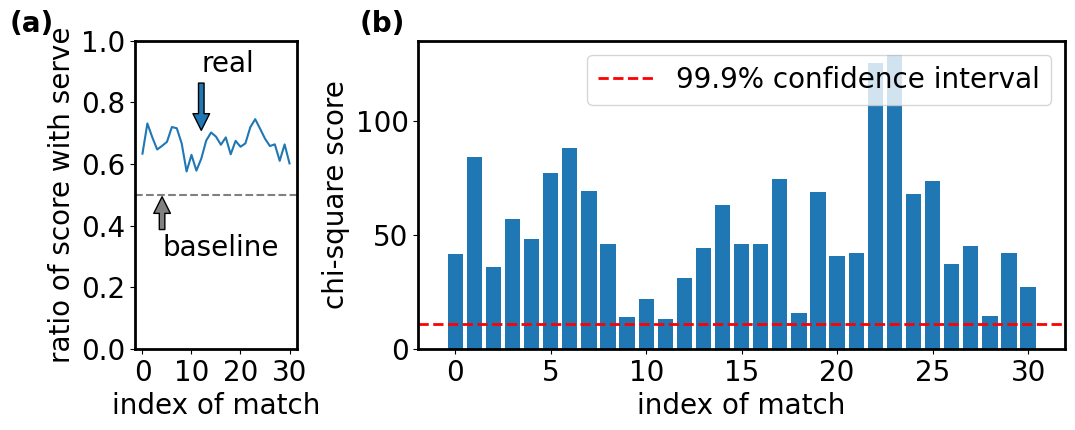

In [48]:
import scipy.stats as stats

# 卡方检验发球优势
def chi_square_test_serve(res_dict):
    player_win_with_serve = res_dict['player_score_serve']
    player_win_with_return = res_dict['player_score_return']
    player_loss_with_serve =  res_dict['player_score_return']
    player_loss_with_return = res_dict['player_score_serve']
    
    # print(player1_score)

    # 卡方检验
    a = player_win_with_serve
    b = player_win_with_return
    c = player_loss_with_serve
    d = player_loss_with_return
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验发球优势
chi_square_score_list = []
ratio_of_score_with_serve = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    ratio_of_score_with_serve.append(res_dict['player_score_serve']/res_dict['player_score'])
    chi_square_score = chi_square_test_serve(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score': 0, 'player_score_serve': 0, 'player_score_return': 0, 'player_score_after_win_point': 0, 'player_score_after_lost_point': 0, 'player_score_after_win_game': 0, 'player_score_after_lost_game': 0, 'player_score_after_win_set': 0, 'player_score_after_lost_set': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_serve(match_all)
print(chi_square_score_all)

# 可视化发球优势kappa
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 4), width_ratios=[1, 4])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.3)

# 堆叠箱线图，显示每局比赛中先发优势的分布情况
ax = axes[0]
ax.plot(ratio_of_score_with_serve)
# 添加箭头和文字 real, 字体大小
ax.annotate('real', xy=(12, 0.7), xytext=(12, 0.9),
            arrowprops=dict( shrink=0.05),
            fontsize=fondsize
            )
ax.axhline(y=0.5, color='grey', linestyle='--', label='50%')
# 添加箭头和文字 baseline, 字体大小
ax.annotate('baseline', xy=(4, 0.5), xytext=(4, 0.3),
            arrowprops=dict(facecolor='grey', shrink=0.05),
            fontsize=fondsize
            )

ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('ratio of score with serve', fontsize=fondsize)
# plt.title('Ratio of score with serve', fontsize=fondsize)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
# 图左上标号（a）
ax.text(-0.5, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
# ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\serve_advantage_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()



In [56]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_point_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_point_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_point_with_server']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_point_with_return']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_point_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_win_with_serve
    b = player_win_after_lose_with_serve
    c = player_loss_after_win_with_serve
    d = player_loss_after_loss_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_point_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_point_with_server': 0, 'player_score_after_win_point_with_server': 0, 'player_score_after_lost_point_with_return': 0, 'player_score_after_win_point_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_point_with_server(match_all)
print(chi_square_score_all)

[0.2166873415945818, 0.0, 0.020548594480556414, 0.07005846774193537, 0.18078626569766498, 0.5118274302363401, 3.0745564203240607, 0.8968701983043809, 0.15595470451837962, 5.364495110400549, 0.7829633920100305, 0.0, 0.0, 0.469670877529334, 0.0, 0.18882101940612528, 0.0, 0.1808657019320708, 0.0, 0.9411934885189777, 0.13096153001457442, 0.9764454778860083, 0.003815275444201743, 2.7525840034695195, 0.19664540028812513, 0.4949107038619363, 1.6373980130661165, 0.3126681232448745, 0.1455659787367108, 1.2127436813044647, 0.727656122247916]
{'player_score_after_lost_point_with_server': 1459, 'player_score_after_win_point_with_server': 2601, 'player_score_after_lost_point_with_return': 1233, 'player_score_after_win_point_with_return': 803}
6.985106934319569


[0.0311284046692607, 10.132530120481928, 5.944954128440367, 4.370629370629371, 0.6183574879227053, 10.425992779783394, 25.906735751295336, 14.726114649681529, 0.7231638418079096, 13.798507462686567, 5.673758865248227, 0.034334763948497854, 0.8097165991902834, 0.2064516129032258, 5.866666666666666, 5.231884057971015, 2.708994708994709, 8.356521739130434, 0.9423076923076923, 12.28936170212766, 4.371584699453552, 9.73913043478261, 12.27007299270073, 41.47085201793722, 10.782051282051283, 10.38135593220339, 10.645569620253164, 0.39779005524861877, 1.8333333333333333, 0.011764705882352941, 0.1736111111111111]
{'player_score': 7284, 'player_score_serve': 4833, 'player_score_return': 2451, 'player_score_after_win_point': 3404, 'player_score_after_lost_point': 2692, 'player_score_after_win_game': 2529, 'player_score_after_lost_game': 4027, 'player_score_after_win_set': 2740, 'player_score_after_lost_set': 2617}
165.85334645669292


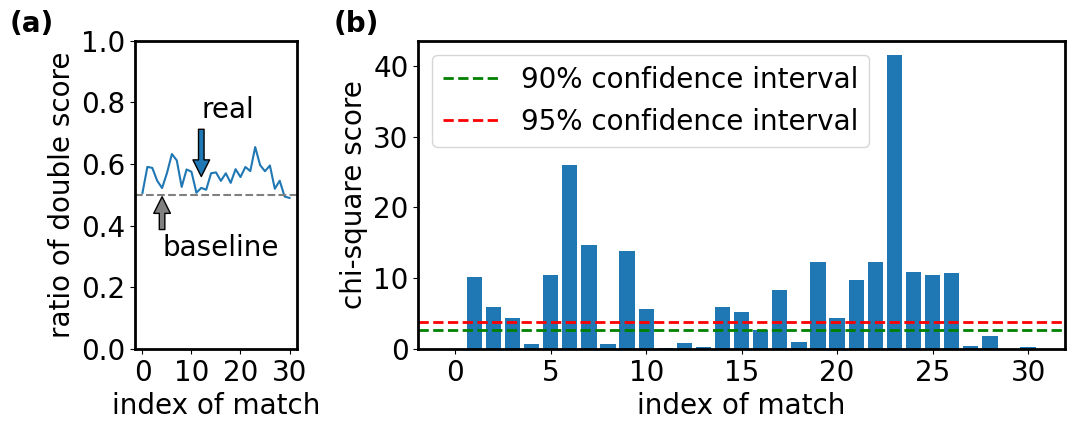

In [57]:
# 卡方检验Momentum_last_point
def chi_square_test_momentum(res_dict):
    player_win_after_lose = res_dict['player_score_after_lost_point']
    player_win_after_win = res_dict['player_score_after_win_point']
    player_loss_after_win =  res_dict['player_score_after_win_point']
    player_loss_after_loss = res_dict['player_score_after_lost_point']
    # 卡方检验
    a = player_win_after_lose
    b = player_win_after_win
    c = player_loss_after_win
    d = player_loss_after_loss
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score
    # 穷举所有的比赛
chi_square_score_list = []
ratio_of_score_with_momentum = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_momentum(res_dict)
    chi_square_score_list.append(chi_square_score)
    ratio_of_score_with_momentum.append(res_dict['player_score_after_win_point']/(res_dict['player_score_after_win_point']+res_dict['player_score_after_lost_point']))
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score': 0, 'player_score_serve': 0, 'player_score_return': 0, 'player_score_after_win_point': 0, 'player_score_after_lost_point': 0, 'player_score_after_win_game': 0, 'player_score_after_lost_game': 0, 'player_score_after_win_set': 0, 'player_score_after_lost_set': 0}
for match_id, match in grouped:
    res_dict = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict[key]
print(match_all)
chi_square_score_all = chi_square_test_momentum(match_all)
print(chi_square_score_all)

# 可视化 momentum kappa
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 4), width_ratios=[1, 4])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.3)

# 堆叠箱线图，显示每局比赛中先发优势的分布情况
ax = axes[0]
ax.plot(ratio_of_score_with_momentum)
# 添加箭头和文字 real, 字体大小
ax.annotate('real', xy=(12, 0.55), xytext=(12, 0.75),
            arrowprops=dict( shrink=0.05),
            fontsize=fondsize
            )
ax.axhline(y=0.5, color='grey', linestyle='--', label='50%')
# 添加箭头和文字 baseline, 字体大小
ax.annotate('baseline', xy=(4, 0.5), xytext=(4, 0.3),
            arrowprops=dict(facecolor='grey', shrink=0.05),
            fontsize=fondsize
            )

ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('ratio of double score', fontsize=fondsize)
# plt.title('Ratio of score with serve', fontsize=fondsize)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
# 图左上标号（a）
ax.text(-0.5, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=2.706, color='g', linestyle='--', label='90% confidence interval', linewidth=2)
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval', linewidth=2)
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval')
ax.legend()
# 图左上标号（b）
ax.text(-0.06, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\momentum_kappa_last_point.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()


In [58]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_game_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_game_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_game_with_server']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_game_with_return']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_game_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_win_with_serve
    b = player_win_after_lose_with_serve
    c = player_loss_after_win_with_serve
    d = player_loss_after_loss_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_game_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_game_with_server': 0, 'player_score_after_win_game_with_server': 0, 'player_score_after_lost_game_with_return': 0, 'player_score_after_win_game_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_game_with_server(match_all)
print(chi_square_score_all)


[0.5861262061452436, 0.0, 1.2674999999999998, 0.544066519677894, 0.7124821976412977, 0.0, 0.21228260869565221, 0.7650875478815455, 0.0922026726155122, 0.790535458546668, 0.0, 0.0, 0.038518473788109284, 0.13088642659279784, 0.6888917004048581, 0.3012272226138505, 0.0022161274155254158, 0.0, 0.322464298110775, 0.0, 0.0, 7.280237722048067, 0.6395755580398496, 0.39408523318512906, 0.08528637927545031, 0.045414155818351516, 8.568816821056132, 0.08220943405694175, 0.30356317669382743, 0.00857469512195122, 0.6693627968785896]
{'player_score_after_lost_game_with_server': 3732, 'player_score_after_win_game_with_server': 619, 'player_score_after_lost_game_with_return': 295, 'player_score_after_win_game_with_return': 1910}
0.807704681784011


[5.701818181818182, 71.50837988826815, 3.75, 23.300970873786408, 22.624434389140273, 42.88235294117647, 71.37327188940093, 35.174418604651166, 17.679558011049725, 0.028469750889679714, 10.813793103448276, 1.352, 11.7, 22.011904761904763, 41.34444444444444, 23.027397260273972, 20.876288659793815, 40.653225806451616, 4.411764705882353, 33.267716535433074, 19.457286432160803, 4.571428571428571, 88.23606557377049, 97.78571428571429, 40.47674418604651, 35.706563706563706, 0.4311377245508982, 11.736040609137056, 3.4829931972789114, 28.9, 5.315254237288135]
{'player_score': 7284, 'player_score_serve': 4833, 'player_score_return': 2451, 'player_score_after_win_point': 3404, 'player_score_after_lost_point': 2692, 'player_score_after_win_game': 2529, 'player_score_after_lost_game': 4027, 'player_score_after_win_set': 2740, 'player_score_after_lost_set': 2617}
683.6513117754729


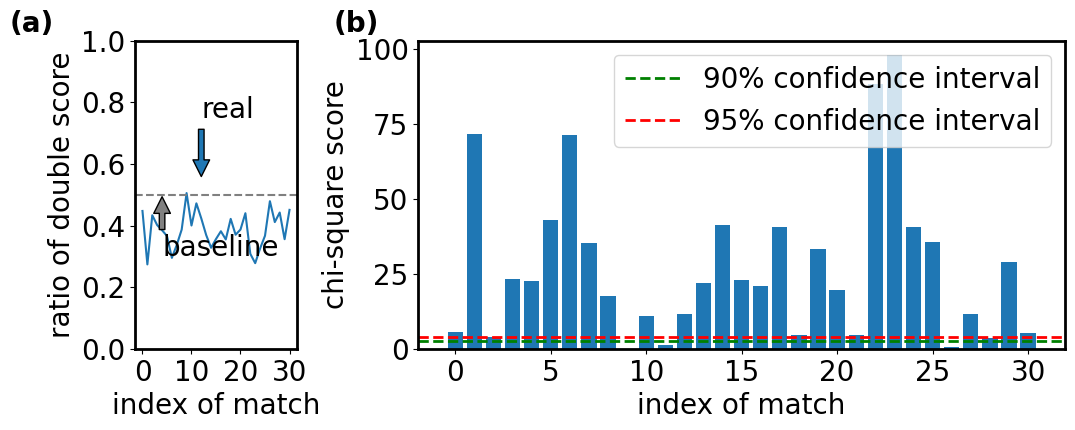

In [26]:
# 卡方检验Momentum_last_game
def chi_square_test_momentum(res_dict):
    player_win_after_lose = res_dict['player_score_after_lost_game']
    player_win_after_win = res_dict['player_score_after_win_game']
    player_loss_after_win = res_dict['player_score_after_win_game']
    player_loss_after_loss = res_dict['player_score_after_lost_game']
    # 卡方检验
    a = player_win_after_lose
    b = player_win_after_win
    c = player_loss_after_win
    d = player_loss_after_loss
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score
    # 穷举所有的比赛
chi_square_score_list = []
ratio_of_score_with_momentum = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_momentum(res_dict)
    chi_square_score_list.append(chi_square_score)
    ratio_of_score_with_momentum.append(res_dict['player_score_after_win_game']/(res_dict['player_score_after_win_game']+res_dict['player_score_after_lost_game']))
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score': 0, 'player_score_serve': 0, 'player_score_return': 0, 'player_score_after_win_point': 0, 'player_score_after_lost_point': 0, 'player_score_after_win_game': 0, 'player_score_after_lost_game': 0, 'player_score_after_win_set': 0, 'player_score_after_lost_set': 0}
for match_id, match in grouped:
    res_dict = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict[key]
print(match_all)
chi_square_score_all = chi_square_test_momentum(match_all)
print(chi_square_score_all)

# 可视化 momentum kappa
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 4), width_ratios=[1, 4])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.3)

# 堆叠箱线图，显示每局比赛中先发优势的分布情况
ax = axes[0]
ax.plot(ratio_of_score_with_momentum)
# 添加箭头和文字 real, 字体大小
ax.annotate('real', xy=(12, 0.55), xytext=(12, 0.75),
            arrowprops=dict( shrink=0.05),
            fontsize=fondsize
            )
ax.axhline(y=0.5, color='grey', linestyle='--', label='50%')
# 添加箭头和文字 baseline, 字体大小
ax.annotate('baseline', xy=(4, 0.5), xytext=(4, 0.3),
            arrowprops=dict(facecolor='grey', shrink=0.05),
            fontsize=fondsize
            )

ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('ratio of double score', fontsize=fondsize)
# plt.title('Ratio of score with serve', fontsize=fondsize)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
# 图左上标号（a）
ax.text(-0.5, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=2.706, color='g', linestyle='--', label='90% confidence interval', linewidth=2)
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval', linewidth=2)
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval')
ax.legend()
# 图左上标号（b）
ax.text(-0.06, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\momentum_kappa_last_game.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()


In [59]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_set_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_set_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_set_with_server']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_set_with_return']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_set_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_win_with_serve
    b = player_win_after_lose_with_serve
    c = player_loss_after_win_with_serve
    d = player_loss_after_loss_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_set_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_set_with_server': 0, 'player_score_after_win_set_with_server': 0, 'player_score_after_lost_set_with_return': 0, 'player_score_after_win_set_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_set_with_server(match_all)
print(chi_square_score_all)

[0.0768140862915863, 0.40234258984258997, 6.0057332041343665, 0.0075447771058457635, 0.4607431290891879, 0.27972724285546524, 2.5377513258592925, 0.5778418045705276, 0.0027773077182419873, 1.1850296040996358, 5.867456896551724, 0.07601706803834438, 0.014126202280484525, 8.889163043150045, 0.8470820576498785, 2.427455357142858, 0.4070640419706635, 0.10735921883387434, 5.694533248081841, 0.4398055931798263, 7.818464554789775, 5.001140266176957, 0.11376051911295669, 3.8408193810248603, 2.0067313347030327, 0.0, 1.046368482250124, 0.0, 1.3743815570644355, 0.20576768719183608, 0.0]
{'player_score_after_lost_set_with_server': 1803, 'player_score_after_win_set_with_server': 1762, 'player_score_after_lost_set_with_return': 814, 'player_score_after_win_set_with_return': 978}
7.487350283333244


[0.8438818565400844, 0.12, 11.388235294117647, 0.4555160142348754, 0.043243243243243246, 0.0, 2.2533333333333334, 0.015384615384615385, 0.0, 4.038167938931298, 11.755555555555556, 0.494949494949495, 0.0, 9.520661157024794, 1.680672268907563, 3.8793103448275863, 0.10714285714285714, 0.01, 6.87719298245614, 0.4083333333333333, 6.106870229007634, 4.013888888888889, 0.0, 2.295918367346939, 2.796116504854369, 0.0365296803652968, 1.4184397163120568, 0.05161290322580645, 2.691588785046729, 0.33783783783783783, 0.2491349480968858]
{'player_score': 7284, 'player_score_serve': 4833, 'player_score_return': 2451, 'player_score_after_win_point': 3404, 'player_score_after_lost_point': 2692, 'player_score_after_win_game': 2529, 'player_score_after_lost_game': 4027, 'player_score_after_win_set': 2740, 'player_score_after_lost_set': 2617}
5.556841515773754


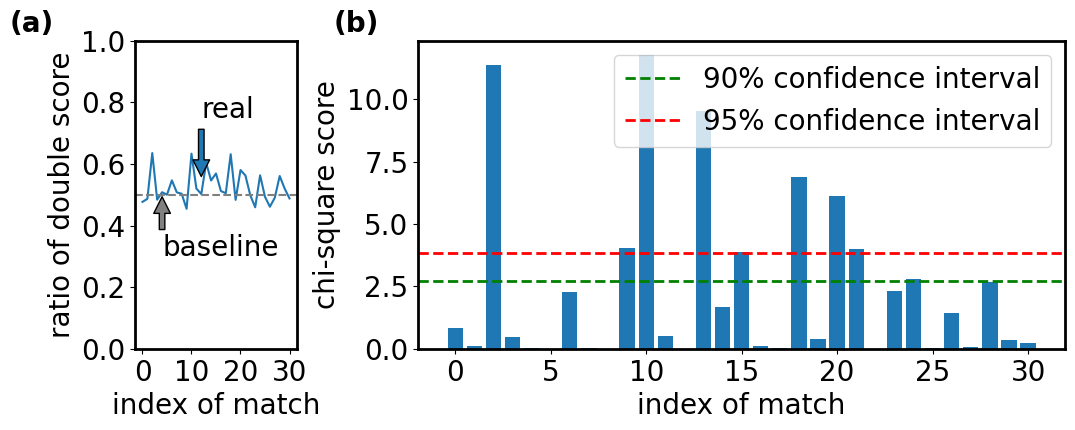

In [27]:
# 卡方检验Momentum_last_set
def chi_square_test_momentum(res_dict):
    player_win_after_lose = res_dict['player_score_after_lost_set']
    player_win_after_win = res_dict['player_score_after_win_set']
    player_loss_after_win = res_dict['player_score_after_win_set']
    player_loss_after_loss = res_dict['player_score_after_lost_set']

    # 卡方检验
    a = player_win_after_lose
    b = player_win_after_win
    c = player_loss_after_win
    d = player_loss_after_loss
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score
    # 穷举所有的比赛
chi_square_score_list = []
ratio_of_score_with_momentum = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_momentum(res_dict)
    chi_square_score_list.append(chi_square_score)
    ratio_of_score_with_momentum.append(res_dict['player_score_after_win_set']/(res_dict['player_score_after_win_set']+res_dict['player_score_after_lost_set']))
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score': 0, 'player_score_serve': 0, 'player_score_return': 0, 'player_score_after_win_point': 0, 'player_score_after_lost_point': 0, 'player_score_after_win_game': 0, 'player_score_after_lost_game': 0, 'player_score_after_win_set': 0, 'player_score_after_lost_set': 0}
for match_id, match in grouped:
    res_dict = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict[key]
print(match_all)
chi_square_score_all = chi_square_test_momentum(match_all)
print(chi_square_score_all)

# 可视化 momentum kappa
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 4), width_ratios=[1, 4])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.3)

# 堆叠箱线图，显示每局比赛中先发优势的分布情况
ax = axes[0]
ax.plot(ratio_of_score_with_momentum)
# 添加箭头和文字 real, 字体大小
ax.annotate('real', xy=(12, 0.55), xytext=(12, 0.75),
            arrowprops=dict( shrink=0.05),
            fontsize=fondsize
            )
ax.axhline(y=0.5, color='grey', linestyle='--', label='50%')
# 添加箭头和文字 baseline, 字体大小
ax.annotate('baseline', xy=(4, 0.5), xytext=(4, 0.3),
            arrowprops=dict(facecolor='grey', shrink=0.05),
            fontsize=fondsize
            )

ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('ratio of double score', fontsize=fondsize)
# plt.title('Ratio of score with serve', fontsize=fondsize)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_yticks(np.arange(0, 1.1, 0.2))
# 图左上标号（a）
ax.text(-0.5, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=2.706, color='g', linestyle='--', label='90% confidence interval', linewidth=2)
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval', linewidth=2)
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval')
ax.legend()
# 图左上标号（b）
ax.text(-0.06, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\momentum_kappa_last_set.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()


In [ ]:


# remove 发球优势对检验momentum的影响
def chi_square_test_momentum_without_serve(res_dict):
    player_win_after_loss_with_serve = res_dict['player1_loss_after_win_with_return'] + res_dict['player2_loss_after_win_with_return']
    player_loss_after_loss_with_serve = res_dict['player1_win_double_count_with_return'] + res_dict['player2_win_double_count_with_return']
    player_win_double_count_with_serve = res_dict['player1_win_double_count_with_serve'] + res_dict['player2_win_double_count_with_serve']
    player_loss_after_win_with_serve = res_dict['player1_loss_after_win_with_serve'] + res_dict['player2_loss_after_win_with_serve']
    # print(player1_score)

    # 卡方检验
    a = sum(player_win_after_loss_with_serve)
    b = sum(player_win_double_count_with_serve)
    c = sum(player_loss_after_loss_with_serve)
    d = sum(player_loss_after_win_with_serve)
    
    chi_square_score = (a*d-b*c)**2*(a+b+c+d)/(a+b)/(c+d)/(a+c)/(b+d)
    # print(chi_square_score)
    return chi_square_score

In [220]:
# remove 发球优势对检验momentum的影响
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_momentum_without_serve(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
# def chi_square_test_momentum_without_serve(res_dict):
    # player_win_after_loss_with_serve = res_dict['player1_loss_after_win_with_return'] + res_dict['player2_loss_after_win_with_return']
    # player_loss_after_loss_with_serve = res_dict['player1_win_double_count_with_return'] + res_dict['player2_win_double_count_with_return']
    # player_win_double_count_with_serve = res_dict['player1_win_double_count_with_serve'] + res_dict['player2_win_double_count_with_serve']
    # player_loss_after_win_with_serve = res_dict['player1_loss_after_win_with_serve'] + res_dict['player2_loss_after_win_with_serve']

match_all = {'player1_loss_after_win_with_return':0, 'player2_loss_after_win_with_return':0, 'player1_win_double_count_with_return':0, 'player2_win_double_count_with_return':0, 'player1_loss_after_win_with_serve':0, 'player2_loss_after_win_with_serve':0, 'player1_win_double_count_with_serve':0, 'player2_win_double_count_with_serve':[]}
for match_id, match in grouped:
    res_dict = analyse_match(match)
    for key in match_all.keys():
        match_all[key].extend(res_dict[key])
print(match_all)
chi_square_score_all = chi_square_test_momentum_without_serve(match_all)
print(chi_square_score_all)


[0.04272045028142589, 4.700793078586879e-05, 0.42738858089135295, 0.017184955918098547, 5.43585650761247e-05, 0.2803011324846851, 2.0549643268075957, 1.2833902559527195, 0.9674329773466421, 3.888012095865337, 2.539176570458404, 0.7390683337347946, 0.40660983106632537, 1.7054665242165243, 1.1007343930910816, 0.059340659340659345, 0.1087448817749571, 0.12245985939239407, 0.016859286424503815, 0.010266099704717204, 1.3128541686773563, 3.807083258010575, 0.6334206629587625, 5.720366117980311, 0.5618390129259694, 0.08117258622793222, 4.98987133680342, 0.000748761371020143, 1.3995996771589991, 0.4128334529686653, 0.013861395787321715]
{'player1_loss_after_win_with_return': [8, 10, 8, 14, 9, 12, 10, 4, 5, 3, 8, 5, 6, 8, 15, 5, 5, 7, 9, 7, 7, 10, 14, 8, 10, 8, 13, 9, 14, 5, 8, 7, 4, 11, 6, 4, 8, 4, 4, 8, 8, 3, 9, 8, 4, 7, 8, 13, 10, 4, 8, 7, 17, 10, 6, 7, 5, 3, 12, 10, 5, 7, 7, 8, 11, 10, 6, 9, 10, 7, 11, 4, 7, 8, 7, 15, 8, 5, 4, 6, 7, 8, 5, 11, 8, 7, 9, 9, 7, 3, 12, 5, 8, 8, 5, 8, 12, 6, 4, 5